In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import product

In [8]:
scenario = 1
case = 1
data = pd.DataFrame()
for i in range(11):
    df = pd.read_excel(f'data/raw/1.InerciaGeneralizada-DisparoGenerador/Scenario{scenario}Case{case}Result{i}_processed.xlsx')
    df = df.set_index('Time (s)')
    
    df['target_fmin'] = df['Fmin (Hz)'].min()
    df['target_fcoi'] = df['Fcoi (Hz)'].min()
    df['scenario'] = f'{scenario}'
    df['case'] = f'{case}'
    df['scenario_case_result'] = f'{scenario}_{case}_{i}'    
    data = pd.concat((data, df))

In [9]:
data.describe()

,Fmin (Hz),Fmax (Hz),Fcoi (Hz),AngB1 (degrees),AngB1_unwrapped (degrees),AngB2 (degrees),AngB2_unwrapped (degrees),AngB3 (degrees),AngB3_unwrapped (degrees),target_fmin,target_fcoi
count,253451.000000,253451.000000,253451.000000,253451.000000,253451.000000,253451.000000,253451.000000,253451.000000,253451.000000,253451.000000,253451.000000
mean,57.410296,57.410296,57.409827,-1.110467,-11.358577,-0.624903,-2.650595,-0.852080,-5.426320,56.325662,56.327307
std,0.779535,0.779535,0.777680,100.823774,3.107151,100.681734,2.645840,100.705571,2.519237,0.051143,0.051024
min,56.242477,56.242477,56.244239,-179.998800,-15.898461,-179.996662,-7.018839,-179.999656,-9.688515,56.242477,56.244239
25%,57.227477,57.227477,57.227519,-85.009087,-12.250887,-84.715099,-3.403433,-84.775181,-6.126502,56.277352,56.279118
50%,57.272676,57.272676,57.272697,-0.288062,-11.928203,4.571290,-3.094188,2.159496,-5.816575,56.327193,56.328885
75%,57.371949,57.371949,57.372252,83.585547,-11.570270,83.382901,-2.767582,83.427899,-5.520379,56.374281,56.375814
max,60.124027,60.124027,60.049205,179.999912,0.040457,179.999265,9.598322,179.998686,4.211094,56.404249,56.405637


In [12]:
df[['Fmin (Hz)']].idxmin()

Fmin (Hz)    3.78559
dtype: float64

"df[['Fmin (Hz)']].plot(figsize=(20,5), zorder=1)\nplt.xticks(df.index[::1000])\nplt.scatter([df[['Fmin (Hz)']].idxmin()], [df[['Fmin (Hz)']].min()], color='red', zorder=2)"

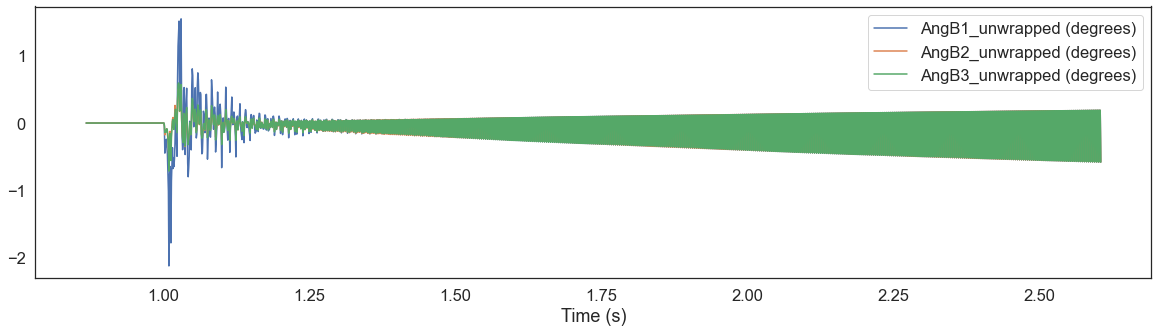

In [45]:
sns.set(style='white', font_scale=1.5)
values = (df[['AngB1_unwrapped (degrees)', 'AngB2_unwrapped (degrees)', 'AngB3_unwrapped (degrees)']] - df[['AngB1_unwrapped (degrees)', 'AngB2_unwrapped (degrees)', 'AngB3_unwrapped (degrees)']].shift(1)).dropna()
values.iloc[1000:3000].plot(figsize=(20,5))
#plt.xticks(df.index[::1000])

"""df[['Fmin (Hz)']].plot(figsize=(20,5), zorder=1)
plt.xticks(df.index[::1000])
plt.scatter([df[['Fmin (Hz)']].idxmin()], [df[['Fmin (Hz)']].min()], color='red', zorder=2)"""


<AxesSubplot:xlabel='Time (s)'>

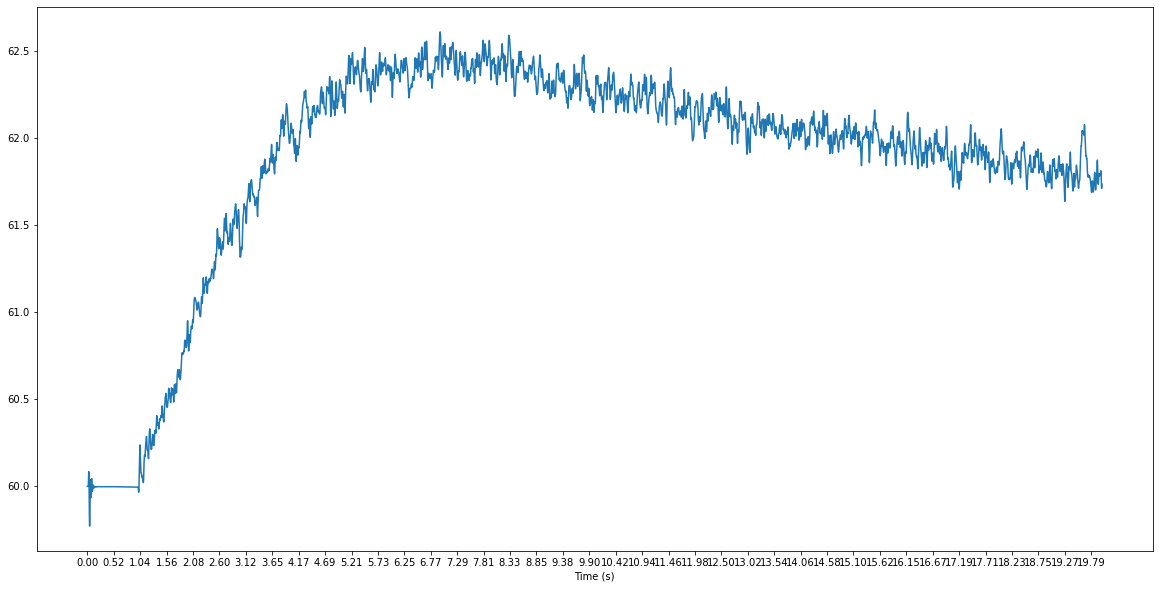

<Figure size 1440x720 with 0 Axes>

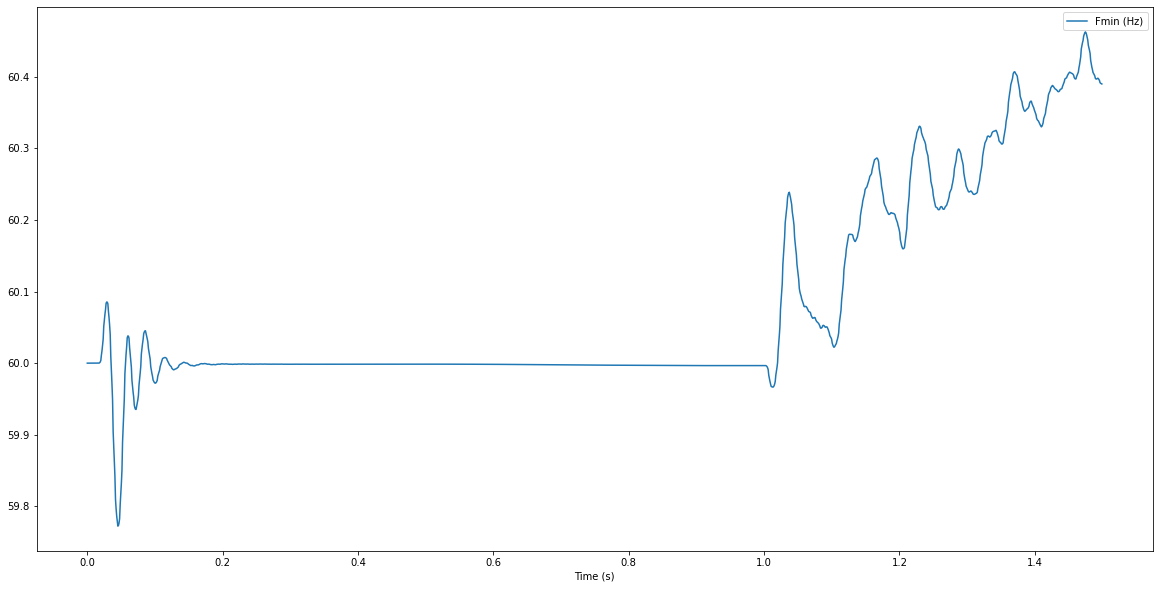

In [6]:
plt.figure(figsize=(20,10))
df['Fmin (Hz)'].plot(figsize=(20,10))
plt.xticks(df.index[::600])


plt.figure(figsize=(20,10))
df.loc[df.index<1.5,['Fmin (Hz)']].plot(figsize=(20,10))

<AxesSubplot:xlabel='Time (s)'>

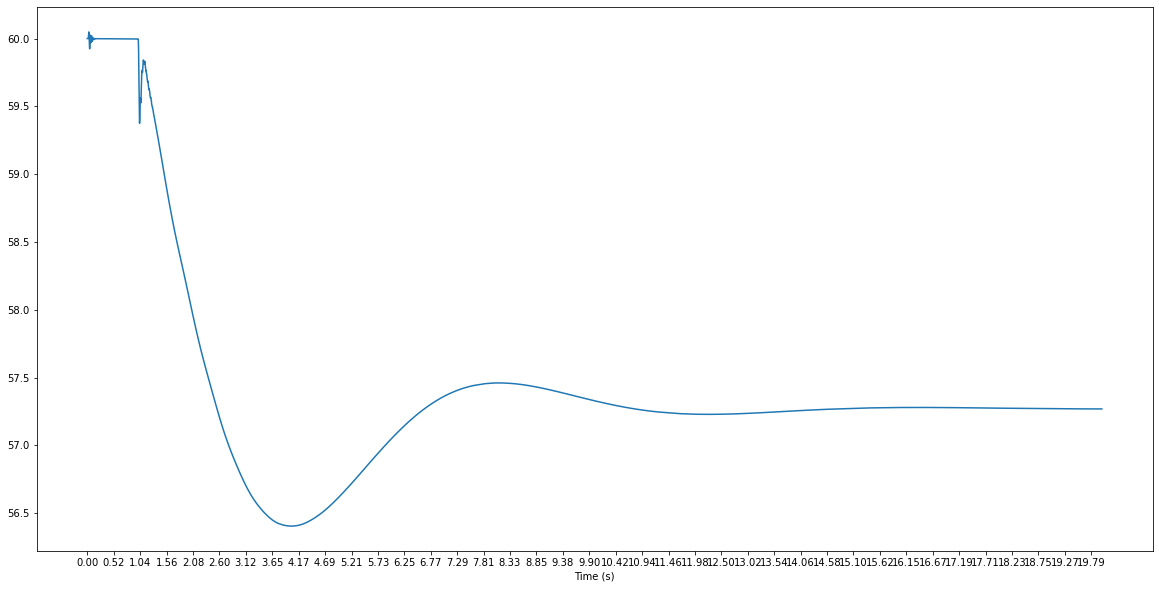

<Figure size 1440x720 with 0 Axes>

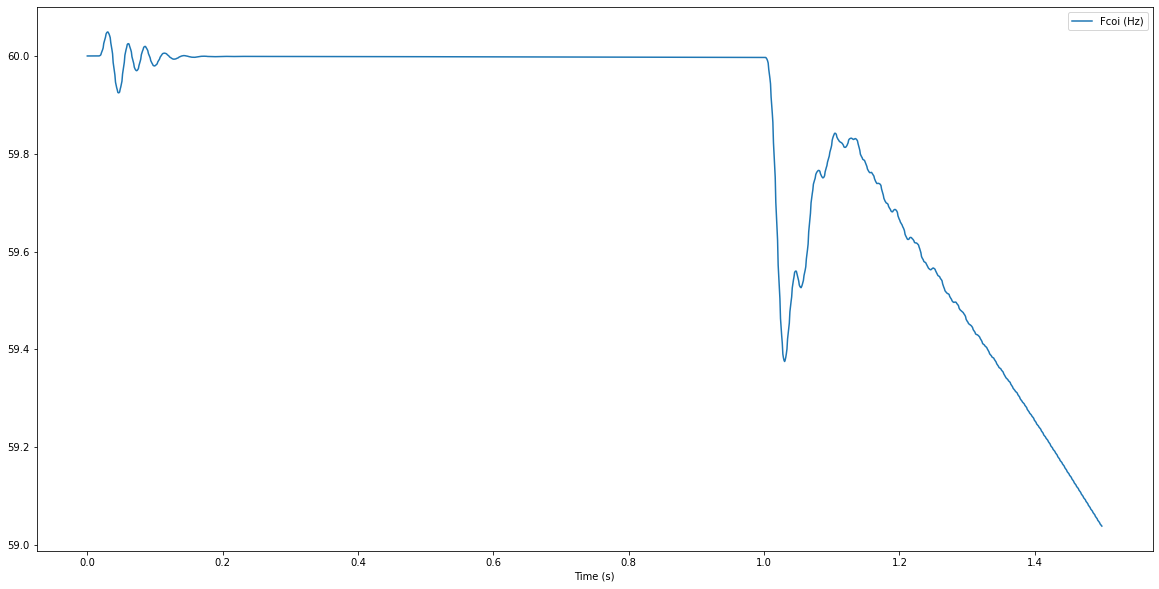

In [20]:
plt.figure(figsize=(20,10))
df['Fcoi (Hz)'].plot(figsize=(20,10))
plt.xticks(df.index[::600])


plt.figure(figsize=(20,10))
df.loc[df.index<1.5,['Fcoi (Hz)']].plot(figsize=(20,10))

<AxesSubplot:xlabel='Time (s)', ylabel='Fmax (Hz)'>

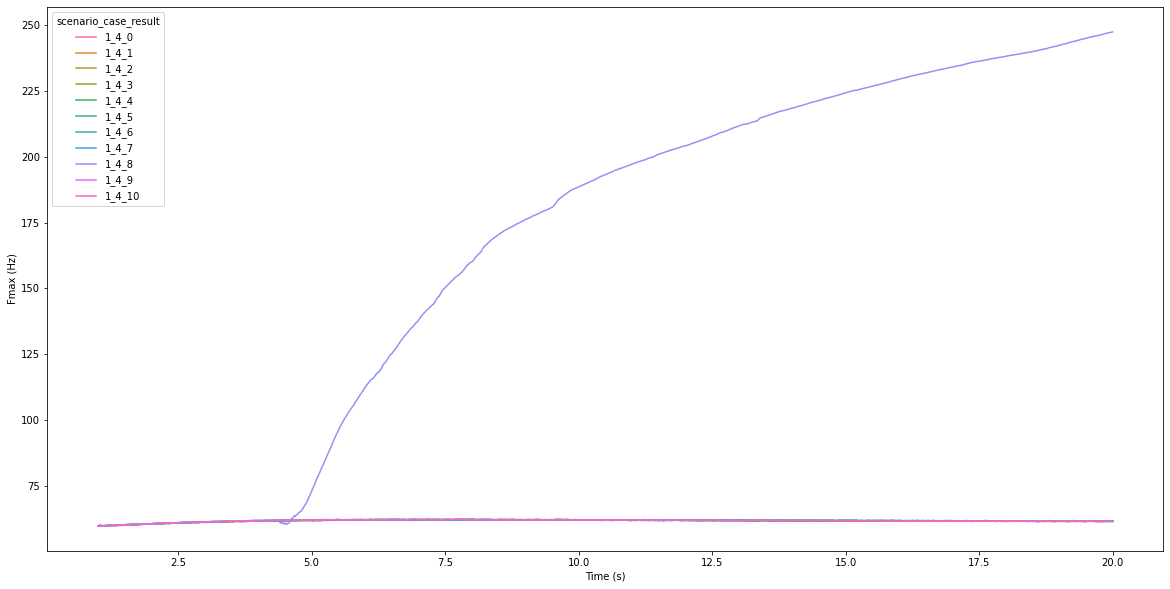

In [8]:
plt.figure(figsize=(20,10))
shortened_data = data.loc[(data.index>1)]
sns.lineplot(
    data=shortened_data.reset_index(),
    x="Time (s)", y="Fmax (Hz)", hue="scenario_case_result"
)

<AxesSubplot:xlabel='Time (s)', ylabel='AngB1_unwrapped (degrees)'>

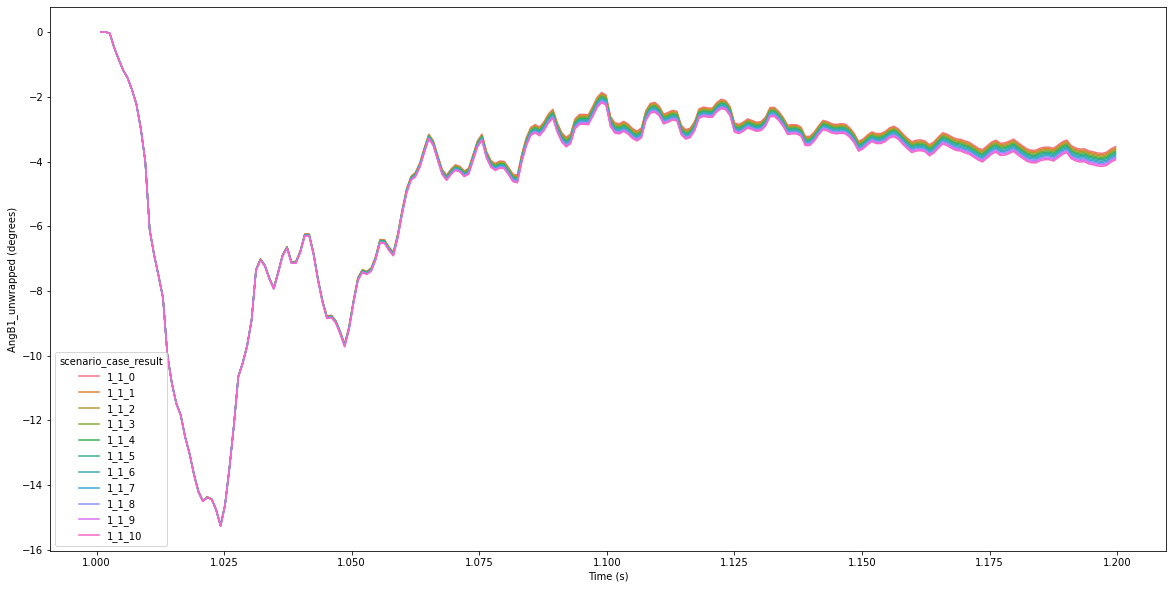

In [21]:
plt.figure(figsize=(20,10))
shortened_data = data.loc[(data.index<1.2) & (data.index>1)]
sns.lineplot(
    data=shortened_data.reset_index(),
    x="Time (s)", y='AngB1_unwrapped (degrees)', hue="scenario_case_result"
)

<AxesSubplot:xlabel='Time (s)', ylabel='AngB2_unwrapped (degrees)'>

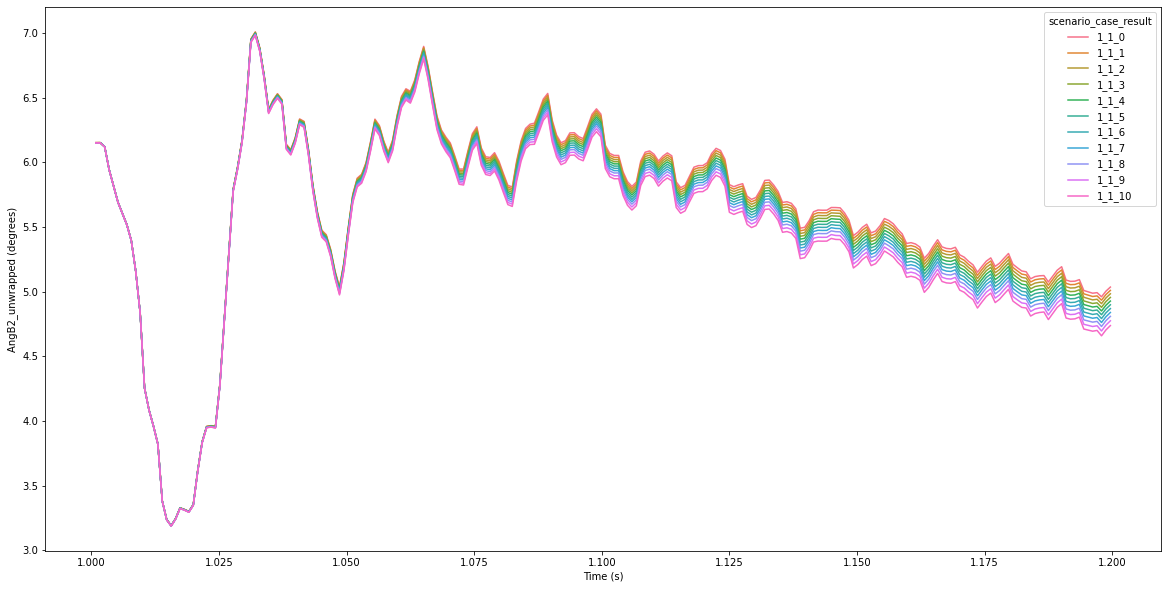

In [22]:
plt.figure(figsize=(20,10))
shortened_data = data.loc[(data.index<1.2) & (data.index>1)]
sns.lineplot(
    data=shortened_data.reset_index(),
    x="Time (s)", y='AngB2_unwrapped (degrees)', hue="scenario_case_result"
)